In [229]:
from torch.distributions.normal import Normal
from torch import tensor, sqrt
import matplotlib.pyplot as plt
from torchviz import make_dot

%matplotlib inline

In [230]:
class Model():
    
    def __init__(self):
        self.w_mu = tensor([6.]) 
        self.w_var = tensor([0.03])
        self.b_mu = tensor([6.])
        self.b_var = tensor([0.03])
        self.w = Normal(self.w_mu, sqrt(self.w_var))
        self.b = Normal(self.b_mu, sqrt(self.b_var))
        
    def sample(self, x):
        return self.w.sample() * x + self.b.sample()

In [231]:
m = Model()

In [232]:
x = tensor([3.])
x.requires_grad_()

tensor([3.], requires_grad=True)

In [233]:
data = torch.tensor([m.sample(x) for _ in range(100000)])
# w_prior = torch.tensor([m.w.sample() for _ in range(100000)])
# b_prior = torch.tensor([m.b.sample() for _ in range(100000)])

(array([4.3000e+01, 6.8200e+02, 4.9050e+03, 1.7652e+04, 3.1739e+04,
        2.8807e+04, 1.2982e+04, 2.8680e+03, 2.9900e+02, 2.3000e+01]),
 array([21.726149, 22.195393, 22.664635, 23.133879, 23.603123, 24.072365,
        24.541609, 25.010853, 25.480097, 25.949339, 26.418583],
       dtype=float32),
 <a list of 10 Patch objects>)

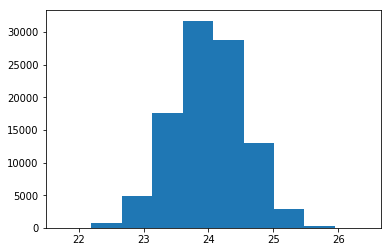

In [234]:
plt.hist(data)

In [235]:
data.mean(), x * m.w_mu + m.b_mu

(tensor(24.0019), tensor([24.], grad_fn=<AddBackward0>))

In [236]:
data.var(), (x**2) * m.w_var + m.b_var

(tensor(0.2987), tensor([0.3000], grad_fn=<AddBackward0>))

In [204]:
# plt.hist(w_prior)

In [245]:
# plt.hist(b_prior)
item = m.sample(x)
item

tensor([23.8006], grad_fn=<AddBackward0>)

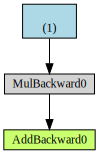